# Introduction to Scikit-Learn(sklearn)

### Practise Notebook Only


## 0. An end-to-end Scikit-Learn workflow

In [251]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together"]

In [252]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [1]:
import numpy as np

In [2]:
# 1.Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X(Feature Matrix)
X = heart_disease.drop("target", axis=1)

# Create y(labels)
y = heart_disease["target"]

In [4]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# n_estimators = 100
# we will keep Default hyperparameters
clf.get_params() #These are the hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Video-102

In [5]:
# We can just ignore all warnings if we know that warning
# import warnings
# warnings.filterwarnings("ignore") # if we want to get all warning back then pass "default" instead of ignore

In [6]:
import sklearn
sklearn.show_versions()
# To upgrade any packages use managing packages using pip 
# To upgrade packages you have to uninstall some dependent packages then install with specified versions dependencies packages


System:
    python: 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
executable: C:\ProgramData\Anaconda3\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
       pip: 20.0.2
setuptools: 27.2.0
   sklearn: 0.22.2.post1
     numpy: 1.18.2
     scipy: 1.4.1
    Cython: 0.25.2
    pandas: 1.0.3
matplotlib: 3.2.1
    joblib: 0.14.1

Built with OpenMP: True


In [7]:
# 3.Fit the model to thX
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [8]:
clf.fit(X_train,y_train)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2


In [9]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [10]:
y_test

138    1
9      1
5      1
14     1
186    0
      ..
123    1
152    1
223    0
70     1
203    0
Name: target, Length: 61, dtype: int64

In [11]:
#4. Evaluate the model on training data and test data
clf.score(X_train, y_train)


1.0

In [12]:
clf.score(X_test,y_test)

0.7868852459016393

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        22
           1       0.86      0.79      0.83        39

    accuracy                           0.79        61
   macro avg       0.77      0.78      0.78        61
weighted avg       0.80      0.79      0.79        61



In [14]:
confusion_matrix(y_test,y_preds)

array([[17,  5],
       [ 8, 31]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [16]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)* 100:.2f}%")
    print("")

trying model with 10 estimators...
Model accuracy on test set: 75.41%

trying model with 20 estimators...
Model accuracy on test set: 81.97%

trying model with 30 estimators...
Model accuracy on test set: 78.69%

trying model with 40 estimators...
Model accuracy on test set: 85.25%

trying model with 50 estimators...
Model accuracy on test set: 78.69%

trying model with 60 estimators...
Model accuracy on test set: 81.97%

trying model with 70 estimators...
Model accuracy on test set: 83.61%

trying model with 80 estimators...
Model accuracy on test set: 81.97%

trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [17]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb")) #wb for write binary

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb")) #rb for read binary
loaded_model.score(X_test, y_test) # It has taken last estimators value = 90 and accuracy is 78

0.8524590163934426

## Video-103
## 1.Getting your data ready to be used with machine learning
Three main things we have to do:
    1. split the data into features and labels (usually 'X' and 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop("target",axis =1)
y = heart_disease["target"]
X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [23]:
print(X.shape)
print(X.shape[0] *0.8)
242+61

(303, 13)
242.4


303

In [24]:
len(heart_disease)

303

## Video 105 - Getting Your Data Ready:Convert Data into Numbers

### 1.1 make sure it's all numerical

In [25]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
len(car_sales)

1000

In [27]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [28]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
#print(X.head())
#print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [29]:
import pygame as pg

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [30]:
# # Build machine learning model 
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(X_train,y_train) #this gives error because we have categorical data and we have to convert that data into numerical data
# model.score(X_test,y_test)

In [31]:
# Turn Categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [33]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [35]:
# Lets refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)
model.fit(X_train,y_train)

NameError: name 'model' is not defined

In [ ]:
model.score(X_test,y_test)

## Video-106
## Getting your Data Ready- Handle Missing values with pandas

### 1.2 What if there were missing values?

1. Fill them with some missing values (also known as imputation).
2. Remove the sample with missing data altogether


In [36]:
# Importing car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [37]:
car_sales_missing.isna().sum()
len(car_sales_missing)

1000

In [38]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


#### Option1: Fill missing data with pandas

In [39]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("Missing", inplace=True)

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("Missing", inplace=True)

#Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#Fill the "Doors" column
car_sales_missing["Doors"].fillna(3, inplace=True)

In [40]:
#Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [41]:
# Remove Rows with missing cars_values
car_sales_missing.dropna(inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [44]:
# Turn Categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Video-108
### Getting your Data Ready- Handling missing values with scikit-learn
### Option:2 Fill the missing values with scikit-learn

In [45]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [48]:
# Split X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [49]:
#Fill missing value with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

#Define column
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                             ("door_imputer", door_imputer, door_feature),
                             ("num_imputer", num_imputer, num_features)
                            ])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [50]:
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [51]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [52]:
# Turn Categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [53]:
# Now we have got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.21990196728583944

## Video-109
### Choosing the right model for your data

### 2. Choosing the right estimator/algorithm for our problem
Scikit-Learn uses estimator as another term for machine learning model or algorithm. 

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

search for scikilearn ml map -> choosing the right estimator

step-1 - check the Scikit-learn machine learning map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

In [54]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [55]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
# How many sample?
len(boston_df)

506

In [57]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#Create a data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

#Instantiate Ridge Model
model = Ridge()
model.fit(X_train,y_train)

#Check the score of the Ridge model on test data
model.score(X_test,y_test)

0.6662221670168522

How do we improve this score?

What if Ridge wasn't working?

Let's prefer back to the map.... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Video-110
### Choosing the right model for your data -2

In [58]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Setup a random seed
np.random.seed(42)

# Create a data
X = boston_df.drop("target" , axis=1)
y = boston_df["target"]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Create a model
model = RandomForestRegressor()
model.fit(X_train,y_train)

#Check the score of Random Forest Regressor on test data
model.score(X_test,y_test)



0.873969014117403

### 2.2 Choosing an estimator for a classification problem 
Let's go to the map......https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Video-110
### Choosing the right model for your data -3 (Classification)

In [59]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
len(heart_disease)

303

Consulting the map and it says to try 'LinearSVC'

In [61]:
#Imoort LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setup Random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train,y_train)

#Evaluate the Linear SVC
clf.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [62]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [63]:
from sklearn.ensemble import RandomForestClassifier

#Setup Random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Classifier
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)

#Evaluate the Random Forest Classifier
clf1.score(X_test, y_test)

0.8524590163934426

Tidbit:
    1. If you have structured data, use ensemble methods.
    2. If you have unstructured data, use deep learning or transfer learning
    

## Video-114 Fitting a model to the data


## 3. Fit the model /algorithm on our data and use it to make predictions 

### 3.1 Fitting the model to the data

Differents names for:
* `X` = features, features variable, data
* `y` = labels, targets, target variables

In [64]:
from sklearn.ensemble import RandomForestClassifier

#Setup Random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Classifier
clf1 = RandomForestClassifier()

#Fit the model the data (training the machine learning model)
clf1.fit(X_train, y_train)

#Evaluate the Random Forest Classifier (use the patterns the model has done)
clf1.score(X_test, y_test)

0.8524590163934426

In [65]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [66]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [67]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## Video -115  Making predictions with our model
### 3.2 Make predictions using machine learning model

2 ways make prediction:
1. `predict()` 
2. `predict_proba()`


In [68]:
# Use a trained model to make predictions
clf1.predict(np.array([1,7,8,3,4])) #This doesn't work


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test.head()

In [69]:
clf1.predict(X_test) #These is predicted values

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
np.array(y_test) #This is truth values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
# Compare predicted labels to truth labels to evaluate the model
y_preds = clf1.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [72]:
clf1.score(X_test, y_test)

0.8524590163934426

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

## Video-116 Predict() vs predict_proba()

 Make predictions with `predict_proba()`


In [74]:
# predict_proba() returns probabilities of a classification label
clf1.predict_proba(X_test[:5]) #From below execution we get the first column label as 0 and second column label as 1. 

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [75]:
# Let's predict() on the same data..
clf1.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [76]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## Video-117: Making prediction with our model(Regression)

`predict()` can also be used for regression models 

In [77]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [78]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Make a data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split Data into train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create model and fit Data
model = RandomForestRegressor().fit(X_train,y_train)

#Make predictions
y_preds = model.predict(X_test)
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [79]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [80]:
# Compare predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds) #Here it will find difference in first element value with second element value and 
                                     #find mean of all elements. 

2.1226372549019623

## Video-118 Evaluating a machine learning model(Score)


## 4. Evvaluating machine learning model

https://scikit-learn.org/stable/modules/model_evaluation.html

Three ways to Evaluate Scikit-learn models/estimators:
1. Estimators `score`  method
2. The `scoring` parameter
3. Problem-specific metric function.

### 4.1 Evaluate a model with `score` method

In [81]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model1 = RandomForestClassifier().fit(X_train, y_train)


In [82]:
model1.score(X_train, y_train)


1.0

In [83]:
model1.score(X_test, y_test) #Implementation of score method is different than score method of regression (Just check using Shift+Tab)

0.8524590163934426

Let's do the same for Regressor.....

In [84]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Make a data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

#Split Data into train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create model and fit Data
model = RandomForestRegressor().fit(X_train,y_train)

In [85]:
model.score(X_train, y_train)

0.976679849361528

In [86]:
model.score(X_test, y_test) #Score method is different than regressor score method(Use Shift+Tab)

0.873969014117403

## Video-119 Evaluating a machine learning model(Cross Validation)
### 4.2 Evaluating a model using a `Scoring` parameter

In [87]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model1 = RandomForestClassifier().fit(X_train,y_train)

In [88]:
model1.score(X_test, y_test)

0.8524590163934426

In [89]:
cross_val_score(model1, X, y, cv=5) #It will split data X and y into 5 different splits and check an accuracy scores.

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [90]:
cross_val_score(model1, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [91]:
np.random.seed(42)

# Single Training and Test split score
modle1_single_score = model1.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
model1_cross_val_score = np.mean(cross_val_score(model1, X, y, cv=5))

#Compare two
modle1_single_score, model1_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [92]:
# Default Scoring parameter of classifier = mean accuracy
model1.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# Scoring parameter set to none by default
cross_val_score(model1,X,y, cv=5, scoring=None)

## Video-120  Evaluating a Classification model 1(Accuracy)

### 4.2.1- Classification model evaluation metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification Report

**Accuracy**

In [93]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [95]:
np.mean(cross_val_score)

0.8248087431693989

In [96]:
print(f"Heart Disease Classifier Cross-Validated Accuracy:{np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy:82.48%


## Video-121  Evaluating a Classification model 2(ROC Curve)

**Area under the receiver operating characteristic curve (AUC[Area Under Curve]/ROC[Receiver Operating Charateristic])**

* Area Under Curve(AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [97]:
# create X_test.... etc
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [98]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)
#Make predictions with probabilities
y_pros = clf.predict_proba(X_test)
y_pros[:10], len(y_pros)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]), 61)

In [99]:
y_pros_positive = y_pros[:,1]

In [100]:
# Calculate fpr,tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pros_positive)

#Checks the false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

## Video-122  Evaluating a Classification model 3(ROC Curve)

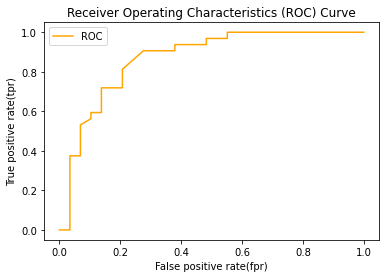

In [101]:
# Create a function for plotting ROC Curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positivve rate (tpr) of model.
    """
    #Plot ROC curve
    plt.plot(fpr, tpr, color = "orange", label= "ROC")
    #Plot line with no predictive power (baseline)
    #plt.plot([0,1], [0,1], color = "darkblue", linestyle="--", label ="Guessing")
    #Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [102]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pros_positive) #This method will give an area which is 89% of total area

0.8669181034482759

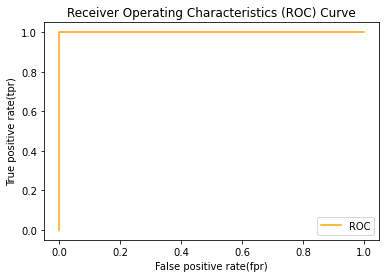

In [103]:
# Plot perfect ROC Curve and AUC Score
fpr, tpr, threshold = roc_curve(y_test, y_test) #This gives perfect curve ie 1
plot_roc_curve(fpr, tpr)

In [104]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

## Video-123  Evaluating a Classification model 4 (Confusion Matrix)

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppose to predict. 

In essence, giving you an idea of where the model is getting confused.

In [105]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [106]:
# visualize confusion matrix 
pd.crosstab(y_test, 
            y_preds,
            rownames =["Actual Labels"],
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [107]:
23 + 6 +6 +26

61

In [108]:
len(y_preds), len(X_test)

(61, 61)

In [109]:
# How to install a pip package using jupyter notebook 
# import sys
# !pip install -U seaborn

In [110]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

#set the font scale 
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using seaborn
sns.heatmap(conf_mat);

## Video-124  Evaluating a Classification model 5 (Confusion Matrix)

In [111]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig,ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(conf_mat,
                     annot = True, # Annotate the boxes with conf_mat info
                     cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happen in matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom +0.5, top-0.5)

plot_conf_mat(conf_mat)

In [112]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X,y);

## Video-125  Evaluating a Classification model 6 (Classification Report)

**Classification Report**

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [114]:
# where precision and recall became valuable
disease_true = np.zeros(10000)
disease_true[0] =1 #only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))
# Here 1.0 column does not predict value for precision, recall, f1-score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## Video-126  Evaluating a Regression model 1 (R2 Score)

### 4.2.2 Regression model evaluation metrics


model evalaution metrics documentations - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-square) or coefficient of determination.
2. Mean absolute error(MAE).
3. Mean square error(MSE).

**R^2**

what are R-squared does: Compare your models predictions to the mean of the targets. these a values can range from 
negative infinity( a very poor model) to 1.
For example, if all your model does is predict the mean of the target, it's r-squared value would be 0. and if your 
model perfectly predicts a range of numbers it's R^2 value would be 1.

In [115]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

reg = RandomForestRegressor().fit(X_train, y_train)

In [116]:
reg.score(X_test, y_test)

0.873969014117403

In [117]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [118]:
y_test.mean()

21.488235294117654

In [119]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [120]:
r2_score(y_test, y_test_mean) #It should be zero  but it shows value (Check this )

2.220446049250313e-16

In [121]:
r2_score(y_test, y_test)

1.0

## Video-127  Evaluating a Regression model 2 (MAE(Mean Absolute Error))

**Mean Absolute Error(MAE)**

MAE is the averages of absolute differences between predictions and actual values. It gives you an idea of how wrong your model predictions are.

In [122]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

y_preds = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [123]:
df = pd.DataFrame(data = {"actual values":y_test,
                          "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


## Video-128  Evaluating a Regression model 3 (MSE(Mean Squared Error))

**Mean Squared Error(MSE)**

In [124]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = reg.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [125]:
# Calsulate MSE by hand
squared = np.square(df["differences"])

In [126]:
squared.mean()

9.24232899019608

## Video-130  Evaluating a model with Cross Validation and Scoring Parameters

### 4.23 Finally using a `scoring` parameter

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target", axis=1)
y =heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()

In [128]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [129]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is:82.48%


In [130]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy") # In score function by default value is accuracy
print(f'The cross -validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross -validated accuracy is:82.48%


In [131]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision.mean()

0.8085601538512754

In [132]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall.mean()

0.8424242424242424

In [133]:
# f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our regression model?

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [135]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.622375083951403

In [136]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [137]:
# mean absolute error
cv_mae = cross_val_score(model,X,y,cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [138]:
#mean square error
cv_mse = cross_val_score(model,X,y,cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.02253826604542

## Video-131  Evaluating a model with Scikit-learn Functions

### 4.3 Using different evaluation metrics as Scikit-learn Functions

**Classification evaluation Function**

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_tarin, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Make some prediction 
y_preds = clf.predict(X_test)

#Evaluate the classifier
print("Classifier metrics on test dataset")
print(f"Accuracy :{ accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision : { precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall:{recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test,y_preds)*100:.2f}%")

Classifier metrics on test dataset
Accuracy :85.25%
Precision : 84.85%
Recall:87.50%
F1: 86.15%


**Regression Evaluation Functions**

In [140]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_preds = reg.predict(X_test)
print(f"r^2 score= {r2_score(y_test, y_preds)*100:.2f}%")
print(f"MAE={mean_absolute_error(y_test, y_preds)}")
print(f"MSE={mean_squared_error(y_test,y_preds)}")

r^2 score= 87.40%
MAE=2.1226372549019623
MSE=9.242328990196082


## Video-132  Improving a machine learning model

### 5. Improving a model
First predictions = baseline predictions.
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs parameters
* Parameters = model find these parameters in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyper-parameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively GridSearchCV

In [141]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [142]:
clf.get_params() #These are Hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Video-133 Tunning Hyperparameters

### 5.1 Tunning Hyperparameters by hand

Let's make three set training, validation and test.

In [143]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [152]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels vs. y_preds labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metrics_dict = {"accuracy": round(accuracy,2),
                    "precision": round(precision,2),
                    "recall": round(recall,2),
                    "f1": round(f1,2)}
    print(f"Acc: {accuracy * 100: .2f}% ")
    print(f"Precision: {precision:.2f}%")
    print(f"recall: {recall:.2f}%")
    print(f"F1 score: {f1:.2f}")
    
    return metrics_dict

In [153]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into x and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train validation and test set
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Train our model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate a classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc:  82.22% 
Precision: 0.81%
recall: 0.88%
F1 score: 0.85


{'accuracy': 0.82, 'f1': 0.85, 'precision': 0.81, 'recall': 0.88}

In [212]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf2_metrics = evaluate_preds(y_valid, y_preds2)
clf2_metrics

Acc:  91.11% 
Precision: 0.92%
recall: 0.92%
F1 score: 0.92


{'accuracy': 0.91, 'f1': 0.92, 'precision': 0.92, 'recall': 0.92}

In [213]:
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=10)
clf3.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds3 = clf3.predict(X_valid)

# Evaluate the 2nd classifier
clf3_metrics = evaluate_preds(y_valid, y_preds3)
clf3_metrics

Acc:  93.33% 
Precision: 0.96%
recall: 0.92%
F1 score: 0.94


{'accuracy': 0.93, 'f1': 0.94, 'precision': 0.96, 'recall': 0.92}

## Video-134 Tunning Hyperparameters 2

### 5.2 Hyperparameters tuning with RandomizedSearchCV

In [197]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)
# Shuffle the data
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, #number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.7s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.7s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.7s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.2s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   52.0s finished


In [198]:
rs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [199]:
# Make predictions with best hyperparameters 
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds) #if we did not get better combination then just increase n_iter and check perfect
                                                # perfect parameters

Acc:  81.97% 
Precision: 0.77%
recall: 0.86%
F1 score: 0.81


## Video-135 Tunning Hyperparameters 3

### 5.3 Hyperparameters tuning with GridSearchCV

In [200]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 100, 200, 500, 1000, 1200]}

In [201]:
grid_2 = {'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2],
          'min_samples_split': [6],
          'n_estimators': [100, 200, 500]} #checking above best parameters and only needed parameters from
                                                           # above is taken.

In [202]:
from sklearn.model_selection import GridSearchCV , train_test_split
np.random.seed(42)

#Split X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                      param_grid = grid_2,
                      cv=5,
                      verbose=2)

#Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_sam

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   37.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [203]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [208]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)


Acc:  78.69% 
Precision: 0.74%
recall: 0.82%
F1 score: 0.78


Let's compare our different models metrics.

In [215]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics
                                })
compare_metrics.plot.bar(figsize=(10, 8))

## Video-137 Saving and Loading a model

## 6.Saving and Loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [218]:
import pickle
# Save an Existing model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl","wb"))

In [222]:
#Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl","rb"))

In [224]:
#Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc:  78.69% 
Precision: 0.74%
recall: 0.82%
F1 score: 0.78


{'accuracy': 0.79, 'f1': 0.78, 'precision': 0.74, 'recall': 0.82}

## Video-138 Saving and Loading a model-2

**Joblib**

In [226]:
from joblib import dump,load

# Save model to file
dump(gs_clf, filename = "gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [231]:
# Import a saved joblib model
loaded_joblib_model = load(filename = "gs_random_forest_model_1.joblib")

In [232]:
# Make and evaluate a joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc:  78.69% 
Precision: 0.74%
recall: 0.82%
F1 score: 0.78


{'accuracy': 0.79, 'f1': 0.78, 'precision': 0.74, 'recall': 0.82}

## Video-139 Putting all together


### 7. Putting it all together
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [236]:
data = pd.read_csv("car-sales-extended-missing-data.csv")

In [237]:
len(data)

1000

In [238]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [239]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [246]:
#Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setup Random seed
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features =  ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

#Setup preprocessing steps( fill missing values, then convert into numbers)
preprocessor = ColumnTransformer(
                            transformers=[
                                ("cat", categorical_transformer, categorical_features),
                                ("door", door_transformer,door_feature),
                                ("num", numeric_transformer, numeric_features)
                            ])

# Creating a  preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data 
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

#


0.22188417408787875

Its also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [248]:
# use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean","median"], #Here we go to the paths strats with preprocessor....
    "model__n_estimators" :[100,1000], #Here double underscore means entering in parameters..
    "model__max_depth":[None, 5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.7s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [249]:
gs_model.score(X_test, y_test)

0.3339554263158365

In [253]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']